# Differential expression analysis


You have run the nf-core/rnaseq pipeline and checked the first quality control metrics of your fastq files. This was, however, only the primary analysis and we want to take it further.

Due to the computational demand of the pipeline, you only ran the pipeline on two of the 16 samples in the study yesterday. We provide you an essential output of nf-core/rnaseq pipeline in the `data` folder: It contains the combined epression matrix as produced by Salmon, which provides transcript levels for each gene (rows) and each sample (columns).


We would now like to understand exactly the difference between the expression in our groups of mice. 
Which pipeline would you use for this?

The pipeline nf-core/differentialabundance can be used.

Have a close look at the pipeline's "Usage" page on the [nf-core docs](nf-co.re). You will need to create a samplesheet (based on the column names in the provided matrix).

In [19]:
import pandas as pd

df = pd.read_csv("data/salmon.merged.gene_counts.tsv", sep='\t')

samples_columns = df.columns[2:]

samplesheet = []

for sample in samples_columns:
    try:
        group, treatment, replicate = sample.split('_')
        condition = f"{group}_{treatment}"
        samplesheet.append({
            "sample": sample,
            "Condition": condition,
            "replicate": int(replicate)
        })
    except ValueError:
        print(f"warning: {sample}")

samplesheet_df = pd.DataFrame(samplesheet)
samplesheet_df.to_csv("samplesheet.csv", index=False)

samplesheet_df

,sample,Condition,replicate
0,Sham_oxy_1,Sham_oxy,1
1,Sham_oxy_2,Sham_oxy,2
2,Sham_oxy_3,Sham_oxy,3
3,Sham_oxy_4,Sham_oxy,4
4,Sham_Sal_1,Sham_Sal,1
5,Sham_Sal_2,Sham_Sal,2
6,Sham_Sal_3,Sham_Sal,3
7,Sham_Sal_4,Sham_Sal,4
8,SNI_oxy_1,SNI_oxy,1
9,SNI_oxy_2,SNI_oxy,2


Please paste here the command you used. You may need to inspect the provided expression matrix more closely and create additional files, like a samplesheet (based on the column names) or a contrast file (there happens to also be one in `data/` that you can use).

In [20]:
!nextflow run nf-core/differentialabundance -r 1.5.0 --input samplesheet.csv --contrasts data/contrasts.csv --matrix data/salmon.merged.gene_counts.tsv --outdir data/results_nf_differentialabundance -profile docker


 N E X T F L O W   ~  version 25.04.7

Launching `https://github.com/nf-core/differentialabundance` [compassionate_bernard] DSL2 - revision: 3dd360fed0 [1.5.0]

WARN: Access to undefined parameter `monochromeLogs` -- Initialise it to a default value eg. `params.monochromeLogs = some_value`


------------------------------------------------------
                                        ,--./,-.
        ___     __   __   __   ___     /,-._.--~'
  |\ | |__  __ /  ` /  \ |__) |__         }  {
  | \| |       \__, \__/ |  \ |___     \`-._,-`-,
                                        `._,._,'
  nf-core/differentialabundance v1.5.0-g3dd360f
------------------------------------------------------
Core Nextflow options
  revision                    : 1.5.0
  runName                     : compassionate_bernard
  containerEngine             : docker
  container                   : [RMARKDOWNNOTEBOOK:biocontainers/r-shinyngs:1.8.8--r43hdfd78af_0]
  launchDir                   : /mnt/c/Users/Mayal/D

Explain all the parameters you set and why you set them in this way. If you used or created additional files as input, explain what they are used for.

--input samplesheet.csv: As input the samplesheet is used, that was created previously from the matrix salmon.merged.gene_counts.tsv.  
--contrasts data/contrasts.csv: For contrats the contrast file was used.  
--matrix data/salmon.merged.gene_counts.tsv: As matrix the given salmon.merged.gene_counts.tsv matrix was used.  
--outdir data/results_nf_differentialabundance: as output directory I created a new folder for the results.  
-profile docker: Docker is used as profile to run the pipeline within containers.


What were the outputs of the pipeline?

The folders:  
- other  
- pipeline_info  
- plots (differential, explanatory and qc)  
- report  
- shinyngs_app  
- tables

In [2]:
#!TODO

Would you exclude any samples? If yes, which and why?

I would exclude SNI_Sal_2 and probably SNI_Sal_4 as they lay far away from all other SNI_Sal samples as outliers in the Principal component (PC) plot (of PC1 and PC2). They also seem to be outliers in the plot of the first three PCs. Both lay along the first Principal component that explains about 22% of the total variance.

How many genes were differentially expressed in each contrast? Does this confirm what the paper mentions?

In my analysis:  

Adjusted:  
SNI_oxy versus SNI_Sal in Condition: 	up: 1	down: 17  
Sham_oxy versus Sham_Sal in Condition: 	up: 7	down: 0

Unadjusted:  
SNI_oxy versus SNI_Sal in Condition 	up: 1	down: 26  
Sham_oxy versus Sham_Sal in Condition 	up: 9	down: 1

In the paper:
The authors gave counts for the different brain regions seperately and made different comparisons.

"[...] Differential expression (DE) analysis showed region-specific alterations in transcriptional profiles. The comparison of SNI-Oxy versus Sham-Sal groups resulted in 1,012 differentially expressed genes (DEGs) in the NAc, 1,116 genes in the mPFC and 533 genes in the VTA (Fig. 3b,e,h; nominal P < 0.05, log 2 fold change ≥ |0.5|). SNI-Sal triggered 1,457 DEGs in the NAc, 1,052 DEGs in the mPFC and 425 DEGs in the VTA as compared to Sham-Sal controls (Fig. 3b,e,h). The Sham-Oxy condition altered 2,609 genes in the NAc, 1,449 genes in the mPFC and 584 genes in the VTA as compared to Sham-Sal controls [...]"

What we both - the authors of the paper and we - did compare, is Sham_oxy versus Sham_Sal. Only for the VTA they compared SNI_oxy versus SNI_Sal too.

For Sham_oxy versus Sham_Sal they found 2,609 genes in the NAc, 1,449 genes in the mPFC and 584 genes in the VTA to be differentially expressed. For SNI_oxy versus SNI_Sal the found 533 (VTA) to be differentially expressed.

In [ ]:
# change in contrasts the conditions, run again to then be able to better compare with conditions of the paper

!nextflow run nf-core/differentialabundance -r 1.5.0 --input samplesheet.csv --contrasts data/contrasts_changed_conditions.csv --matrix data/salmon.merged.gene_counts.tsv --outdir data/results2_nf_differentialabundance -profile docker


 N E X T F L O W   ~  version 25.04.7

Launching `https://github.com/nf-core/differentialabundance` [drunk_golick] DSL2 - revision: 3dd360fed0 [1.5.0]

WARN: Access to undefined parameter `monochromeLogs` -- Initialise it to a default value eg. `params.monochromeLogs = some_value`


------------------------------------------------------
                                        ,--./,-.
        ___     __   __   __   ___     /,-._.--~'
  |\ | |__  __ /  ` /  \ |__) |__         }  {
  | \| |       \__, \__/ |  \ |___     \`-._,-`-,
                                        `._,._,'
  nf-core/differentialabundance v1.5.0-g3dd360f
------------------------------------------------------
Core Nextflow options
  revision                    : 1.5.0
  runName                     : drunk_golick
  containerEngine             : docker
  container                   : [RMARKDOWNNOTEBOOK:biocontainers/r-shinyngs:1.8.8--r43hdfd78af_0]
  launchDir                   : /mnt/c/Users/Mayal/Documents/Uni Tübin

In my analysis:  

Adjusted:   
Sham_Sal versus SNI_oxy in Condition 	up: 0	down: 1  
Sham_Sal versus SNI_Sal in Condition 	up: 1	down: 73  

Unadjusted:  
Sham_Sal versus SNI_oxy in Condition 	up: 0	down: 1  
Sham_Sal versus SNI_Sal in Condition 	up: 1	down: 78  

In the paper they found for Sham_Sal versus SNI_oxy 1012 (NAc), and 1116 (mPFC) differentially expressend genes, for the VTA there was nothing given.  
For Sham_Sal versus SNI_Sal they found 1457 (NAc), 1052 (mPFC), and 425 (VTA) differentially expressend genes.

These are much higher numbers than we found.

The paper mentions differentially expressed genes in three brain regions : the NAc, mPFC and VTA. Briefly explain what these 3 regions are.

NAc is the Nucleus accumbens, which is a core structure in the basal proencephalon. It contains a high number of dopaminergic receptors of type D2, which when stimulated lead to feelings of happiness. Opioides such as oxycodon effect the synaptic transmission (https://flexikon.doccheck.com/de/Nucleus_accumbens).

mPFC stands for medial prefrontal cortex and "[...]contributes to a sense of self and is associated with social aspects of the self [..]" (https://www.sciencedirect.com/topics/medicine-and-dentistry/medial-prefrontal-cortex).

VTA is the ventral tegmental area, which is part of the mesolimbic dopaminergic modulatory transmitter system. Activity in the neurons in this region leads to the activation of neurons in the NAc and thus to the positive reinforcement of behaviour (https://flexikon.doccheck.com/de/Ventrales_tegmentales_Areal).

Is there anyway from the paper and the material and methods for us to know which genes are included in these regions?

Not completely. Some genes are discussed within the paper, but there is no complete list or something similar for us to know  which genes are included in these regions.

Once you have your list of differentially expressed genes, do you think just communicating those to the biologists would be sufficient? What does the publication state?

I think it is important to do further (medical informatics/bioinformatics) analyses to put these differentially expressed genes (DEGs) in context to understand their function and which role they are playing in transcriptiomic processes.
In the puplication too several following analysis are performed, such as a deconvolution analysis to examine how different cell types contribute to transcriptomic changes, a rank–rank hypergeometric overlap analysis, a Gene Ontology analysis to find out more about the molecular signature of the DEGs or IPA canonical analysis to evaluate molecular mechnisms that are influenced by these DEGs.

Please reproduce the Venn Diagram from Figure 3, not taking into account the brain regions but just the contrasts mentionned.

/home/mabile/miniconda3/envs/environment_ubuntu_practical/lib/python3.13/site-packages/matplotlib_venn/layout/venn3/pairwise.py:169: UserWarning: Bad circle positioning.
  warnings.warn("Bad circle positioning.")


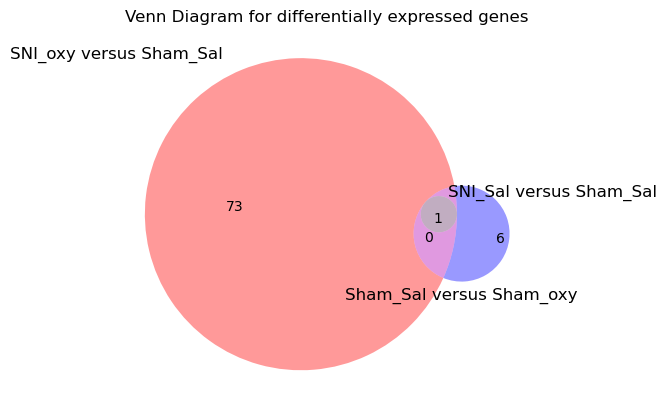

In [ ]:
# Using the changed Conditions "SNI_oxy-Sham_Sal" and "SNI_Sal-Sham_Sal", and from the first analysis the Condition "Sham_Sal,Sham_oxy"

import pandas as pd
from matplotlib_venn import venn3
import matplotlib.pyplot as plt


files = {
    "SNI_oxy-Sham_Sal": "data/results2_nf_differentialabundance/tables/differential/condition_control_treated_test.deseq2.results_filtered.tsv",
    "SNI_Sal-Sham_Sal": "data/results2_nf_differentialabundance/tables/differential/condition_control_treated.deseq2.results_filtered.tsv",
    "Sham_Sal-Sham_oxy": "data/results_nf_differentialabundance/tables/differential/condition_control_treated_test.deseq2.results_filtered.tsv"
}

gene_sets = {}
for name, path in files.items():
    df=pd.read_csv(path, sep="\t")
    gene_sets[name] = set(df["gene_id"])

plt.figure
venn3(subsets=(gene_sets["SNI_oxy-Sham_Sal"], gene_sets["SNI_Sal-Sham_Sal"], gene_sets["Sham_Sal-Sham_oxy"]), set_labels=("SNI_oxy versus Sham_Sal", "SNI_Sal versus Sham_Sal", "Sham_Sal versus Sham_oxy"))
plt.title("Venn Diagram for differentially expressed genes")
plt.show()